# Feature selection with regression lab

You have been exploring feature selection, regularization, and evaluation metrics with classification this week (and last week).

It's time to return to a regression problem.

In this lab you will be working with a dataset on **reservoir levels in California**.

---

### Data summary

The dataset contains these columns:

    id : the reservoir string id
    date : the string date of measurement
    month : the month of measurement
    year : the year of measurement
    reservoir_volume : the current volume of the reservoir
    dam : the dam that supplies water to the reservoir
    lake : a lake associated with the reservoir
    stream : a stream associated with the reservoir
    capacity : the total capacity of the reservoir
    elevation : the string for elevation of the reservoir
    river_basin : string code for basin of the river associated with the reservoir
    county : the string county code that the reservoir is in
    hydrologic_area : another location string identifier
    nearby_city : the city that the reservoir is located near
    latitude : the exact latitude of the reservoir
    longitude : the exact longitude of the reservoir
    operator : the governmental organization that manages the reservoir

---

### Goal of the lab:

Your primary goal is to **predict reservoir levels in 2015 using data from prior years**. Your primary evaluation metric will be **RMSE**, but feel free to try/use others as well.

You have learned may useful skills to tackle this!

- **Data munging/cleaning**
- **EDA**
- **Feature engineering**
- **Feature selection**
- **Regularization/gridsearching**
- **Cross-validation**

Use whatever you can to get the best predictive power! Godspeed.

---

### I WILL BE DOING THE LAB AT THE SAME TIME

**You are competing with me in this lab to get a better RMSE.**

YES, YES, I know it's "unfair" or whatever. However, I will be sharing my progress on my screen as I go through, so you have an advantage in that sense, since you can see what I'm doing as I go.

#### WORK TOGETHER!!!

Good Luck!

---

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
res = pd.read_csv('./dataset/reservoir_levels.csv')

In [87]:
res.dtypes

date                 object
month                 int64
year                  int64
id                   object
reservoir_volume    float64
dam                  object
lake                 object
stream               object
capacity              int64
elevation            object
river_basin          object
county               object
hydrologic_area      object
nearby_city          object
latitude            float64
longitude           float64
operator             object
dtype: object

In [88]:
res['elevation'] = res['elevation'].apply(lambda x: (x.replace("' ft", "")))

In [89]:
res['capacity_ratio'] = res.reservoir_volume / res.capacity

In [90]:
res.elevation = pd.to_numeric(res.elevation, errors='coerce')
res.dropna(how='any')

,date,month,year,id,reservoir_volume,dam,lake,stream,capacity,elevation,river_basin,county,hydrologic_area,nearby_city,latitude,longitude,operator,capacity_ratio
0,2000-02,2,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.998989
1,2000-03,3,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.998989
2,2000-04,4,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.998989
3,2000-05,5,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.998989
4,2000-06,6,2000,APN,8250.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.926966
5,2000-07,7,2000,APN,7295.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.819663
6,2000-08,8,2000,APN,6590.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.740449
7,2000-09,9,2000,APN,5918.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.664944
8,2000-10,10,2000,APN,5442.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.611461
9,2000-11,11,2000,APN,5507.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.940,-122.637,Marin Municipal Water District,0.618764


In [91]:
X = res[res['year'] < 2015]

In [92]:
X.head()

,date,month,year,id,reservoir_volume,dam,lake,stream,capacity,elevation,river_basin,county,hydrologic_area,nearby_city,latitude,longitude,operator,capacity_ratio
0,2000-02,2,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
1,2000-03,3,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
2,2000-04,4,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
3,2000-05,5,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
4,2000-06,6,2000,APN,8250.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.926966


In [93]:
X.corr()

,month,year,reservoir_volume,capacity,elevation,latitude,longitude,capacity_ratio
month,1.000000e+00,-1.463209e-02,-0.008695,-3.551350e-18,1.055535e-18,1.173462e-18,1.969292e-19,-0.126107
year,-1.463209e-02,1.000000e+00,-0.019238,-2.779621e-17,-5.010831e-17,4.254785e-17,-3.295622e-17,-0.055219
reservoir_volume,-8.694660e-03,-1.923831e-02,1.000000,9.696048e-01,-1.706331e-03,-1.673530e-02,3.313789e-01,0.025831
capacity,-3.551350e-18,-2.779621e-17,0.969605,1.000000e+00,1.385063e-02,-1.784848e-02,3.394123e-01,-0.021506
elevation,1.055535e-18,-5.010831e-17,-0.001706,1.385063e-02,1.000000e+00,2.538122e-01,1.842748e-01,-0.160905
latitude,1.173462e-18,4.254785e-17,-0.016735,-1.784848e-02,2.538122e-01,1.000000e+00,-7.387725e-01,0.088177
longitude,1.969292e-19,-3.295622e-17,0.331379,3.394123e-01,1.842748e-01,-7.387725e-01,1.000000e+00,-0.154004
capacity_ratio,-1.261074e-01,-5.521883e-02,0.025831,-2.150608e-02,-1.609045e-01,8.817663e-02,-1.540039e-01,1.000000


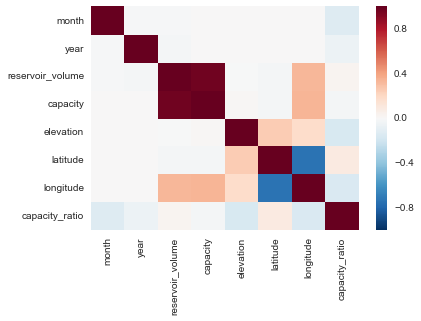

In [94]:
sns.heatmap(X.corr())

In [95]:
res.head()

,date,month,year,id,reservoir_volume,dam,lake,stream,capacity,elevation,river_basin,county,hydrologic_area,nearby_city,latitude,longitude,operator,capacity_ratio
0,2000-02,2,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
1,2000-03,3,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
2,2000-04,4,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
3,2000-05,5,2000,APN,8891.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.998989
4,2000-06,6,2000,APN,8250.0,Alpine,Alpine Lake,Lagunitas Creek,8900,654.0,COAST-MARIN,MARIN,SAN FRANCISCO BAY,STINSON BEACH,37.94,-122.637,Marin Municipal Water District,0.926966


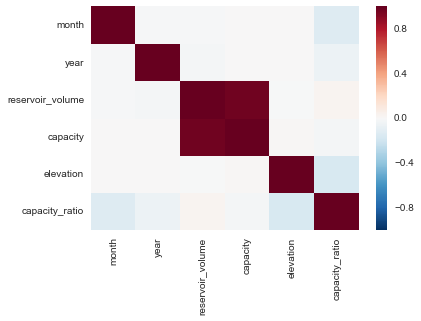

In [84]:
sns.heatmap(X.corr())

In [66]:
import patsy

In [106]:
formula = "reservoir_volume ~ month + year + C(county) + C(river_basin) + C(hydrologic_area)"
Y, X_X = patsy.dmatrices(formula, data = X)
Y = np.ravel(Y)

In [109]:
from sklearn.linear_model import Lasso

lrm = Lasso()

lrm.fit(X_X, Y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
lrm.predict(X_X)

array([  87407.56285411,   82919.99685361,   78432.4308531 , ...,
        117271.56890693,  112784.00290643,  108296.43690593])

In [83]:
X.id.unique()

array(['APN', 'ANT', 'AST', 'BRT', 'BRV', 'BRD', 'BTH', 'BLB', 'BOC',
       'BMP', 'BQC', 'BWN', 'BWS', 'BDP', 'BIO', 'BUC', 'BCL', 'BTV',
       'CCH', 'CVE', 'CMN', 'CFW', 'ALM', 'CPL', 'CSI', 'CAS', 'SLW',
       'CHB', 'CHY', 'JNN', 'CLK', 'CLA', 'CGS', 'CMB', 'CTG', 'CYC',
       'MNC', 'CNV', 'CUY', 'MHV', 'DLV', 'DMV', 'DNP', 'DON', 'DNL',
       'DWN', 'EPK', 'ELC', 'ENR', 'ENG', 'FLR', 'FOL', 'FRL', 'FMD',
       'FRD', 'MIL', 'GLK', 'GBR', 'GBL', 'PWL', 'GNT', 'DAV', 'HWE',
       'HNS', 'HID', 'MEA', 'HNT', 'ICH', 'INL', 'MMW', 'INV', 'IRC',
       'ISB', 'JCK', 'ATN', 'KNT', 'KRH', 'KES', 'LFY', 'LGT', 'HMT',
       'HNN', 'HDG', 'LVD', 'TAH', 'LVY', 'LRA', 'LEW', 'LNG', 'LGV',
       'CRW', 'LON', 'LSB', 'LVQ', 'LWB', 'CRY', 'HHL', 'LYS', 'SWB',
       'MPL', 'EDN', 'MRT', 'MAT', 'MHW', 'MCO', 'MCS', 'MMR', 'MDO',
       'BER', 'MOR', 'MRR', 'NCM', 'NAT', 'BUL', 'MCR', 'NHG', 'NML',
       'NCA', 'ONF', 'HTH', 'ORO', 'LOT', 'PAR', 'HVS', 'PRR', 'PLL',
       'PNF', 'PT6',